# <center> Quality of Life in European Countries


The study analyses the quality od life in selected 30 European countries based on the collected quantitative variables.<br>
Main goal of the study is to determine groups of countries with similar characteristics.<br>
The data is from 2020 and 2019, due to the lack of more recent data available.<br>

Data source: Eurostat, Our World in Data, The World Bank, OECD.

In [127]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [128]:
# Read and view the data
data = pd.read_csv('life.csv', decimal=',', index_col = 'CODE')
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, AUT to TUR
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   COUNTRY             30 non-null     object 
 1   UNEMPLOYMENT        30 non-null     float64
 2   LIFE_EXPECTANCY     30 non-null     float64
 3   HEALTH_EXPENDITURE  30 non-null     float64
 4   INTERNET            30 non-null     float64
 5   DIVORCE_RATE        30 non-null     float64
 6   GPD                 30 non-null     float64
 7   HICP                30 non-null     float64
 8   SOCIAL_EXP          30 non-null     float64
 9   INCOME              30 non-null     float64
 10  POVERTY_RATE        30 non-null     float64
 11  LIVING_CONDITIONS   30 non-null     float64
 12  OVERCROWDING_RATE   30 non-null     float64
 13  ENDS_MEET           30 non-null     float64
 14  WORK_SUNDAYS        30 non-null     float64
 15  FRUIT_VEGETABLES    30 non-null     float64
 16  PHYSICAL_ACT

In [129]:
# Missing data check
data.isnull().any()

COUNTRY               False
UNEMPLOYMENT          False
LIFE_EXPECTANCY       False
HEALTH_EXPENDITURE    False
INTERNET              False
DIVORCE_RATE          False
GPD                   False
HICP                  False
SOCIAL_EXP            False
INCOME                False
POVERTY_RATE          False
LIVING_CONDITIONS     False
OVERCROWDING_RATE     False
ENDS_MEET             False
WORK_SUNDAYS          False
FRUIT_VEGETABLES      False
PHYSICAL_ACTIVITY     False
ALCOHOL               False
SMOKERS               False
DEPRESSION            False
CRIMES                False
AIR_POLLUTION         False
NOISE                 False
dtype: bool

In [250]:
# Preview of the data
data.head()

,COUNTRY,UNEMPLOYMENT,LIFE_EXPECTANCY,HEALTH_EXPENDITURE,INTERNET,DIVORCE_RATE,GPD,HICP,SOCIAL_EXP,INCOME,...,ENDS_MEET,WORK_SUNDAYS,FRUIT_VEGETABLES,PHYSICAL_ACTIVITY,ALCOHOL,SMOKERS,DEPRESSION,CRIMES,AIR_POLLUTION,NOISE
CODE,,,,,,,,,,,,,,,,,,,,,
AUT,Austria,5.36,81.19,8.77,87.53,1.7,48809.23,108.47,34.0,29503.0,...,3.9,13.2,5.6,24.5,2.3,20.2,5.6,5.7,12.23,19.5
BEL,Belgium,5.55,80.80,8.49,91.53,1.8,45517.79,108.23,32.7,27641.0,...,7.8,11.3,15.1,14.6,7.6,14.6,8.4,10.8,12.73,16.0
BGR,Bulgaria,5.12,73.61,5.35,70.16,1.3,10129.81,106.27,18.7,5927.0,...,18.6,8.0,5.0,5.8,1.7,28.7,5.0,19.1,19.93,8.9
HRV,Croatia,7.51,77.72,6.54,78.32,1.3,14198.75,103.06,24.1,8643.0,...,11.1,7.0,9.8,11.1,4.0,21.8,8.9,2.4,18.23,8.2
CYP,Cyprus,7.59,81.14,6.32,90.80,2.6,28036.19,99.67,24.1,19430.0,...,11.2,13.2,7.9,8.6,0.4,21.2,2.5,10.4,15.79,15.4


In [131]:
# Drop the column COUNTRY

life = data.drop(['COUNTRY'], axis =1)
life.head()

,UNEMPLOYMENT,LIFE_EXPECTANCY,HEALTH_EXPENDITURE,INTERNET,DIVORCE_RATE,GPD,HICP,SOCIAL_EXP,INCOME,POVERTY_RATE,...,ENDS_MEET,WORK_SUNDAYS,FRUIT_VEGETABLES,PHYSICAL_ACTIVITY,ALCOHOL,SMOKERS,DEPRESSION,CRIMES,AIR_POLLUTION,NOISE
CODE,,,,,,,,,,,,,,,,,,,,,
AUT,5.36,81.19,8.77,87.53,1.7,48809.23,108.47,34.0,29503.0,18.7,...,3.9,13.2,5.6,24.5,2.3,20.2,5.6,5.7,12.23,19.5
BEL,5.55,80.80,8.49,91.53,1.8,45517.79,108.23,32.7,27641.0,18.9,...,7.8,11.3,15.1,14.6,7.6,14.6,8.4,10.8,12.73,16.0
BGR,5.12,73.61,5.35,70.16,1.3,10129.81,106.27,18.7,5927.0,35.4,...,18.6,8.0,5.0,5.8,1.7,28.7,5.0,19.1,19.93,8.9
HRV,7.51,77.72,6.54,78.32,1.3,14198.75,103.06,24.1,8643.0,22.7,...,11.1,7.0,9.8,11.1,4.0,21.8,8.9,2.4,18.23,8.2
CYP,7.59,81.14,6.32,90.80,2.6,28036.19,99.67,24.1,19430.0,23.2,...,11.2,13.2,7.9,8.6,0.4,21.2,2.5,10.4,15.79,15.4


<br>
<br>
<br>

### Statistics

In [252]:
# Statistics of the data and rounding values
data.describe().round(2)

,UNEMPLOYMENT,LIFE_EXPECTANCY,HEALTH_EXPENDITURE,INTERNET,DIVORCE_RATE,GPD,HICP,SOCIAL_EXP,INCOME,POVERTY_RATE,...,ENDS_MEET,WORK_SUNDAYS,FRUIT_VEGETABLES,PHYSICAL_ACTIVITY,ALCOHOL,SMOKERS,DEPRESSION,CRIMES,AIR_POLLUTION,NOISE
count,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,...,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00,30.00
mean,6.98,79.49,6.90,86.12,1.72,34566.09,109.11,25.38,18811.27,23.16,...,7.64,12.51,11.67,17.02,4.32,17.99,6.40,9.09,13.66,15.55
std,3.27,3.01,1.95,7.49,0.59,24726.09,13.84,6.71,11410.84,5.98,...,6.91,4.87,6.99,10.91,3.34,5.32,2.37,4.53,5.54,5.53
min,2.55,73.61,3.64,70.16,0.50,7733.80,99.67,13.00,4281.00,12.50,...,1.70,4.60,2.40,2.70,0.30,6.40,2.30,2.40,5.64,8.20
25%,4.98,77.08,5.33,79.18,1.32,17796.00,103.93,19.52,9262.50,19.70,...,3.28,9.65,7.75,9.52,1.70,14.60,4.82,5.55,10.02,11.45
50%,6.73,80.96,6.43,87.20,1.70,26252.46,106.66,24.15,16976.00,22.90,...,5.50,12.60,10.15,13.90,3.85,18.80,6.25,8.30,12.72,14.30
75%,8.08,82.03,8.39,91.48,1.98,48300.13,109.50,31.62,28422.50,26.35,...,9.75,14.80,13.58,23.05,5.45,21.00,8.38,11.23,16.88,19.18
max,16.30,83.21,10.91,98.82,2.70,117370.50,179.98,38.10,43687.00,39.80,...,36.10,25.90,32.90,44.50,11.10,28.70,10.80,19.10,26.85,28.30


<br>
<br>
<br>

### Correlation

In [180]:
# Correlation matrix

corr_matrix = life.corr(method = 'spearman')

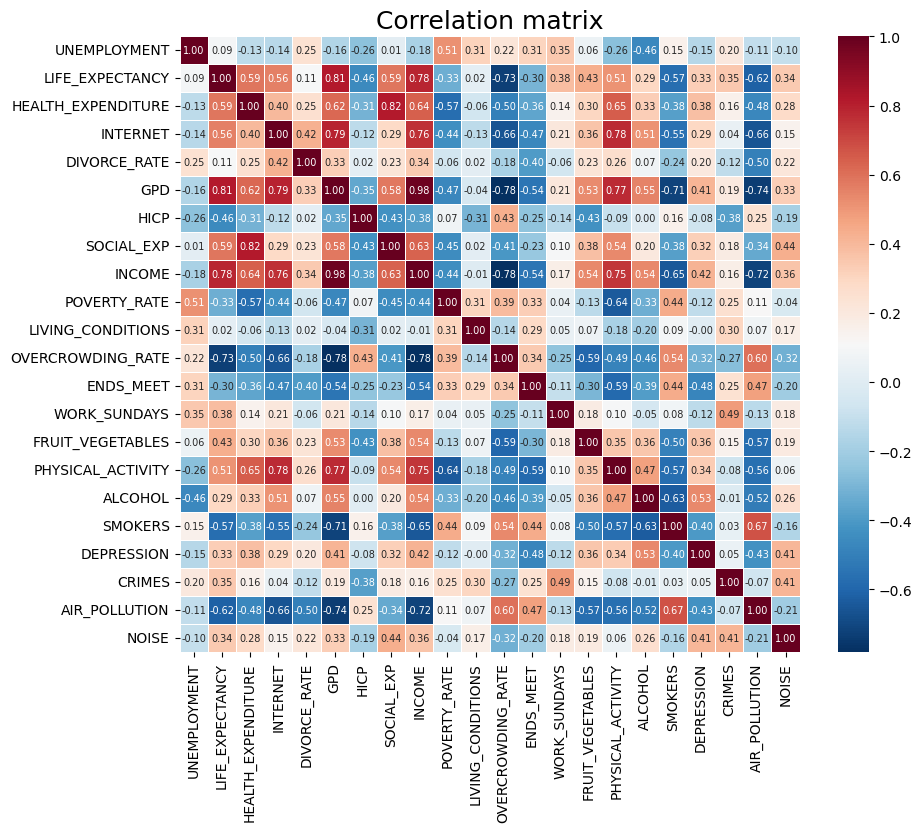

In [181]:
# Visualisation of correlation matrix

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, 
            cmap='RdBu_r', 
            annot = True, 
            fmt=".2f", 
            annot_kws={"size": 7},
            linewidths=0.5)

plt.title('Correlation matrix', fontsize = 18)
plt.show()

<br>
<br>
<br>

### PCA - Principal component analysis

In [174]:
# Data standarisation
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler().fit_transform(life)

In [254]:
# PCA analysis
from sklearn.decomposition import PCA

pca = PCA(n_components = 10)
life_pca = pca.fit_transform(std_data)

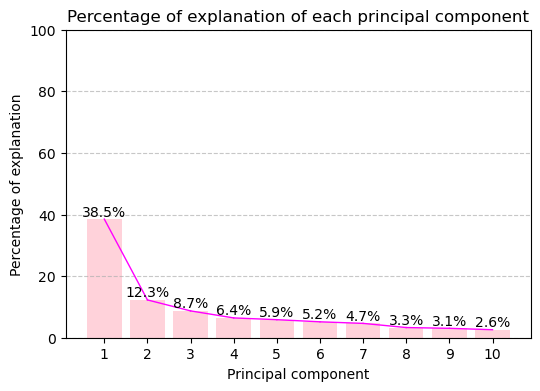

In [255]:
# Explained variation per principal component
explained_variance_ratio = pca.explained_variance_ratio_

# Number of principal components
n_components = len(explained_variance_ratio)
components = range(1, n_components + 1)

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(components, explained_variance_ratio * 100, color='pink', alpha=0.7)

for i in range(n_components - 1):
    x_values = [bars[i].get_x() + bars[i].get_width() / 2, bars[i + 1].get_x() + bars[i + 1].get_width() / 2]
    y_values = [explained_variance_ratio[i] * 100, explained_variance_ratio[i + 1] * 100]
    plt.plot(x_values, y_values, color='magenta', linestyle='-', linewidth=1)

plt.title('Percentage of explanation of each principal component')
plt.xlabel('Principal component')
plt.ylabel('Percentage of explanation')
plt.ylim(0, 100)
plt.xticks(components)

for i, percentage in enumerate(explained_variance_ratio * 100):
    plt.text(components[i], percentage + 1, f'{percentage:.1f}%', ha='center')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [179]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_[0:2]))

Explained variation per principal component: [0.3852507  0.12273835]


<br>
The two main components together explain 50.8% of the variance.
<br>
<br>

#### Similarity of countries based on PCA <br>

In [195]:
names = data.index.tolist()

principal_df = pd.DataFrame(data = life_pca[:,:2],columns = ['pc_1','pc_2'] )
principal_df['country'] = names
principal_df

,pc_1,pc_2,country
0,-1.512399,-0.291373,AUT
1,-2.272062,0.134206,BEL
2,5.009588,-0.010508,BGR
3,2.071673,-1.924974,HRV
4,0.804456,1.611670,CYP
5,0.570039,-2.148260,CZE
6,-4.367357,0.123763,DNK
7,0.201451,-0.942471,EST
8,-3.458281,-0.523086,FIN
9,-2.259231,2.143876,FRA


In [215]:
groups = [0,0,4,2,3,2,0,2,0,0,0,3,2,0,1,2,2,0,1,0,0,2,1,2,4,2,2,3,0,5]
palette = ['green','orange','blue','magenta','yellow','red']
colors = [palette[group] for group in groups]

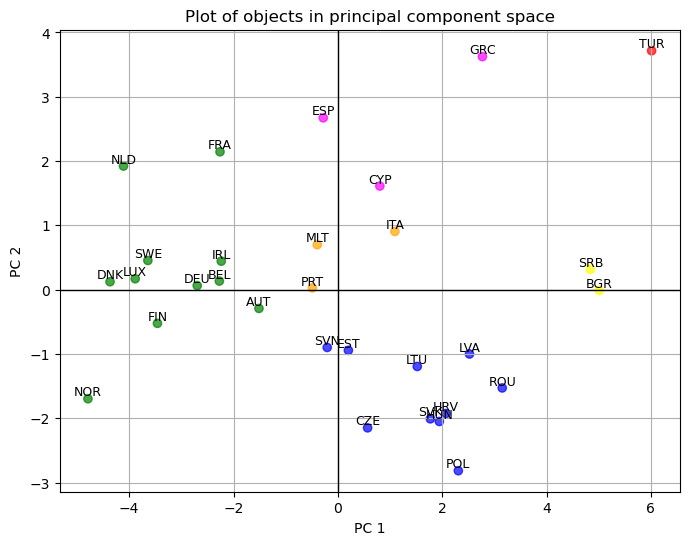

In [217]:
plt.figure(figsize=(8, 6))
plt.scatter(x = principal_df['pc_1'],
            y = principal_df['pc_2'],
            alpha=0.7,
            c = colors)

for i, country in enumerate(principal_df['country']):
    plt.text(principal_df['pc_1'][i], principal_df['pc_2'][i], country, 
             fontsize=9, ha='center', va='bottom')

plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)

plt.title('Plot of objects in principal component space')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.grid(True)
plt.show()

Countries have been divided into six clusters. <br>
Turkey (TUR) definitely stands out from the other countries on the chart.<br>



<br>
<br>
<br>

### Clustering

<Figure size 1000x800 with 0 Axes>

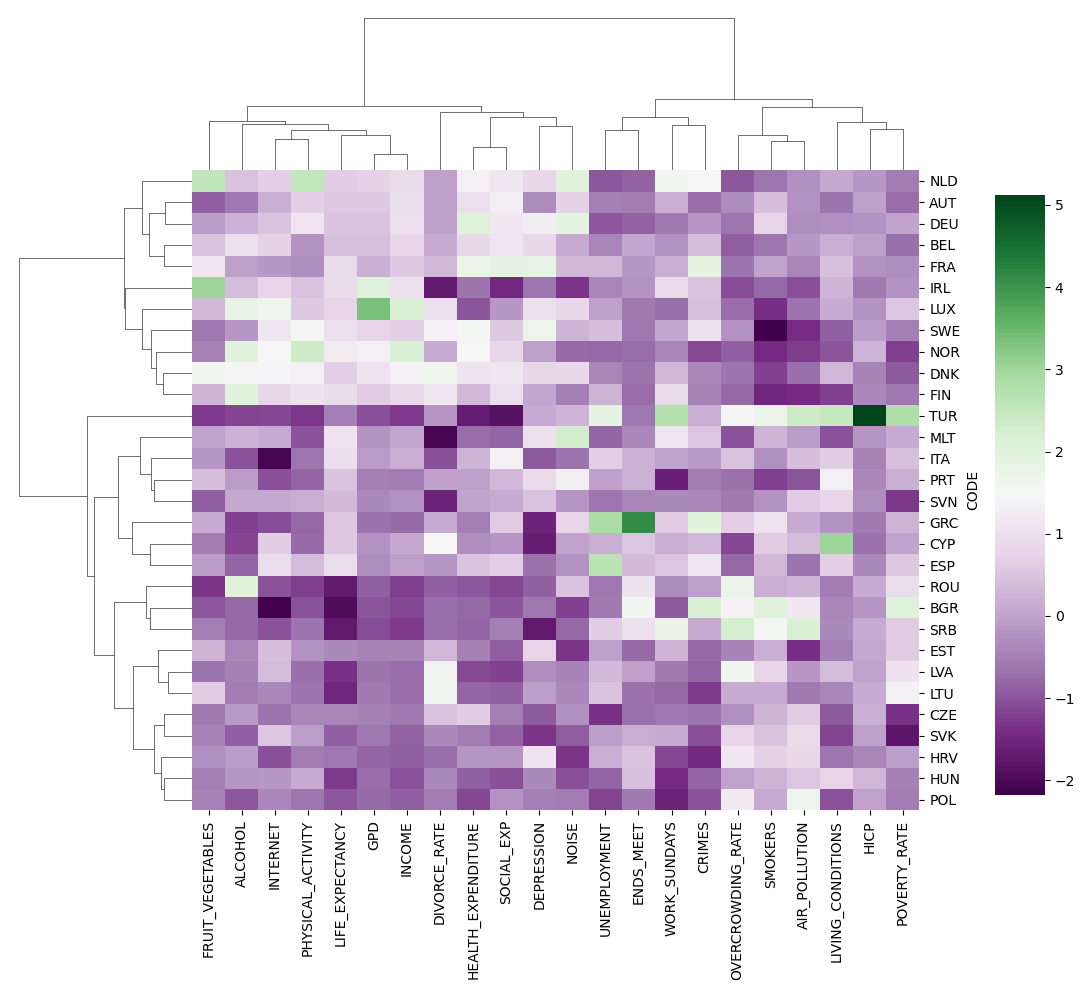

In [249]:
# Clustering analysis

plt.figure(figsize=(10,8))
cluster_map = sns.clustermap(life,
                cmap='PRGn',
                z_score = 1,
                annot = False,
                linecolor = 'white',
                method = 'ward',
                cbar_pos = (1, 0.2, 0.05, 0.6))

plt.show()

Countries were grouped according to similarities and divided into five groups.

<br>

Countries belonging to the relevant groups, formed on the basis of cluster analysis, are shown on a map of Europe

![Life Map](images/life_map.png)<br>
Source: Own development using the Datawrapper.de


The first group (green) comprises the countries of northern and Western Europe. This group includes the Nordic countries, i.e. Denmark, Norway, Sweden, Finland and the 'Old European Union' countries, namely France, the Netherlands, Luxembourg, Germany and Belgium, as well as Austria and Ireland. 
<br>

The second group is Turkey (red). The values of the surveyed variables for Turkey distinguish it significantly from the other analysed countries. 
<br>

The third group (purple) consists of the countries of Mediterranean Europe, which include Portugal, Spain, Italy, Malta, Greece, Cyprus and Slovenia. 
<br>

The fourth group (orange) includes three Balkan countries such as Romania, Serbia and Bulgaria. 
<br>

The fifth group consists of the countries of Central and Eastern Europe (blue), includes Lithuania, Latvia, Estonia, Poland, the Czech Republic, Slovakia, Hungary and Croatia.